# Verizon #2 - Customer Churn Prediction Model
* Challenge Advisor: Dhananjaya Ramachandra
* Contributors: Ria Kundu, Ami Rajesh, David Wang, Rachel Chan, and Maggie Killada

## Initial Setup

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# navigate to data
import os
import pandas as pd

# ensure 'Team Verizon_2' is added to MyDrive'
df_train = pd.read_excel('/content/drive/MyDrive/Team Verizon_2/training and test data/mobile_subscriber_churn_train.xlsx', engine = 'openpyxl')
df_test = pd.read_excel('/content/drive/MyDrive/Team Verizon_2/training and test data/mobile_subscriber_churn_test.xlsx', engine='openpyxl')

In [ ]:
# display
display(df_train.shape)
display(df_train.head())
display(df_test.head())

(4250, 20)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis and Feature Engineering

### EDA on Dataset (with Charts and Statistics)

Before visualizing, it's crucial to understand the structure of the dataset as well as any missing data, incorrect data types, and potential issues with feature distributions.

In [ ]:
# Display basic info
df_train.info()

# Display summary statistics of numerical features
df_summ = df_train.describe()
df_summ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   area_code                      4250 non-null   int64  
 2   international_plan             4250 non-null   int64  
 3   voice_mail_plan                4250 non-null   int64  
 4   number_vmail_messages          4250 non-null   int64  
 5   total_day_minutes              4250 non-null   float64
 6   total_day_calls                4250 non-null   int64  
 7   total_day_charge               4250 non-null   float64
 8   total_eve_minutes              4250 non-null   float64
 9   total_eve_calls                4250 non-null   int64  
 10  total_eve_charge               4250 non-null   float64
 11  total_night_minutes            4250 non-null   float64
 12  total_night_calls              4250 non-null   i

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_urbanization_score
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,436.816000,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706,1.752471
std,39.698401,42.183514,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759,0.826656
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000,1.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000,2.000000
75%,127.000000,415.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000,2.000000
max,243.000000,510.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,3.000000


In [ ]:
# print feature with most variation
print('Feature with most variation: ', df_summ.loc['std'].idxmax())

# print feature with highest range
column_ranges = df_summ.loc['max'] - df_summ.loc['min']
column_range_name = column_ranges.idxmax()
print('Feature with highest range: ', column_range_name)

Feature with most variation:  total_day_minutes
Feature with highest range:  total_night_minutes


In [ ]:
# Check for missing values in the dataset
df_train.isnull().sum()

,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0
total_eve_calls,0


**Histograms to visualize the values of all the numerical features:**

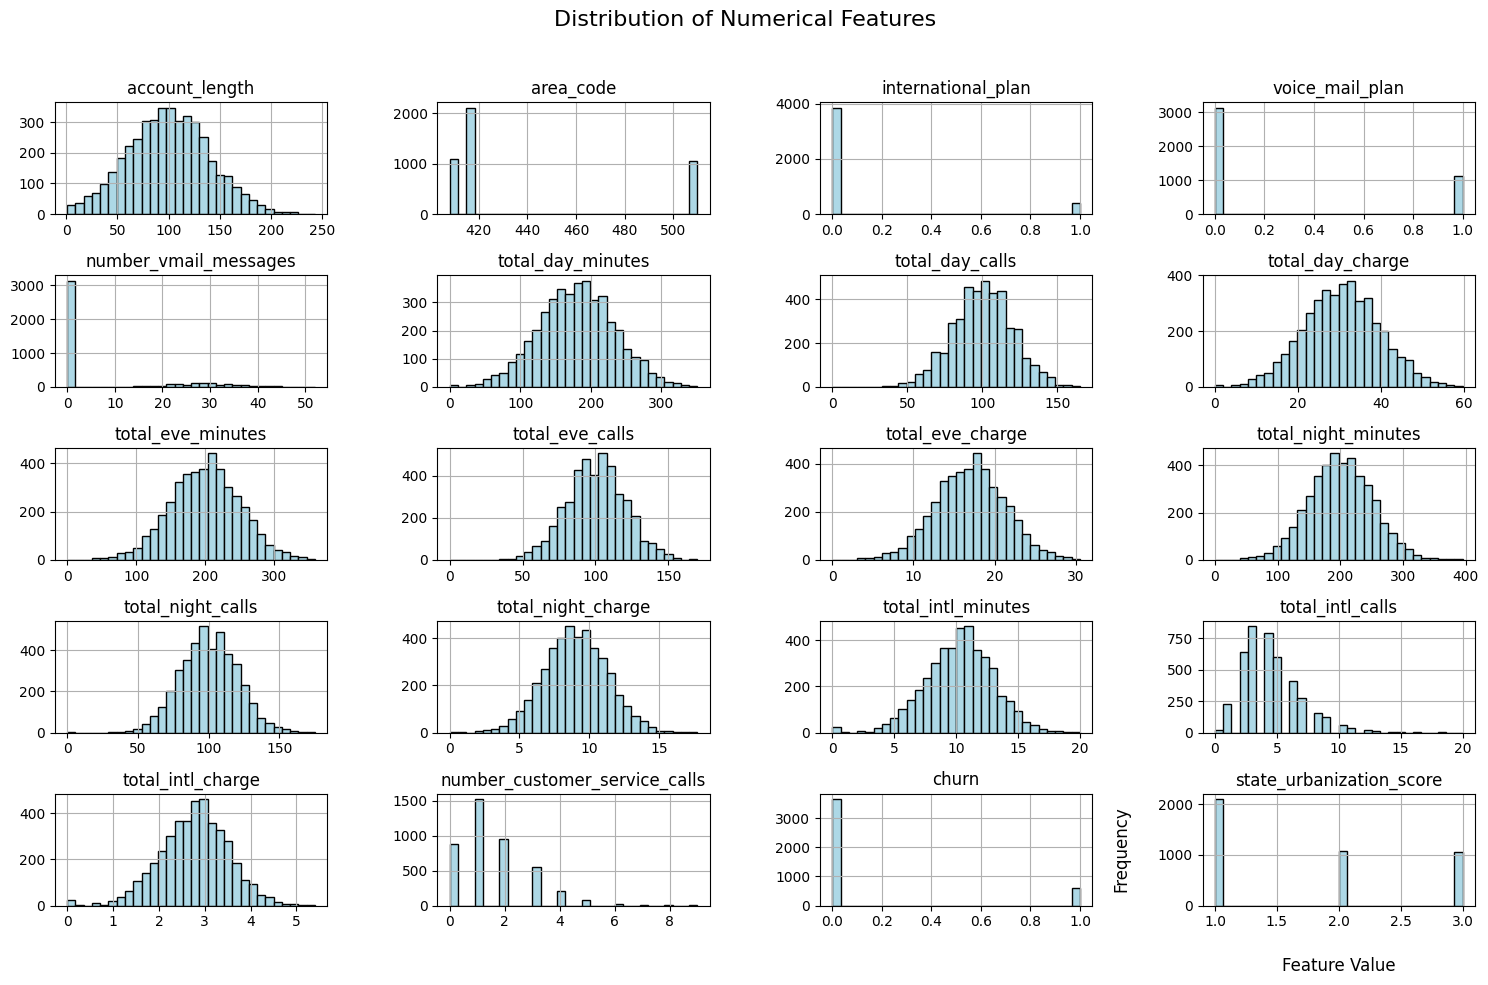

In [ ]:
# Plot histograms for all numerical columns
axes = df_train.hist(bins=30, figsize=(15, 10), color='lightblue', edgecolor='black')

# Add an overall title
plt.suptitle('Distribution of Numerical Features', fontsize=16)

# Common X-axis and Y-axis labels
plt.xlabel('Feature Value', fontsize=12, labelpad=20)  # X-axis label for the entire figure
plt.ylabel('Frequency', fontsize=12, labelpad=20)      # Y-axis label for the entire figure

# Adjust the layout to ensure labels and titles fit properly
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()

- Here is the distribution of the data for all the numerical features in the dataset. As you can see. most of the features have data that is normally distributed, which means that the data is well-distributed, statistically.

- The only features that are not normally distributed are the number_vmail_messages, total_intl_calls, and number_customer_serivce_calls, all of which appear to the skewed right.

- This means that if handling outliers will improve the results of our model, then the only features with values that we should alter are these three that are not evenly distributed.

**Bar chart to visualize the values of 'international_plan' and 'voicemail_plan':**

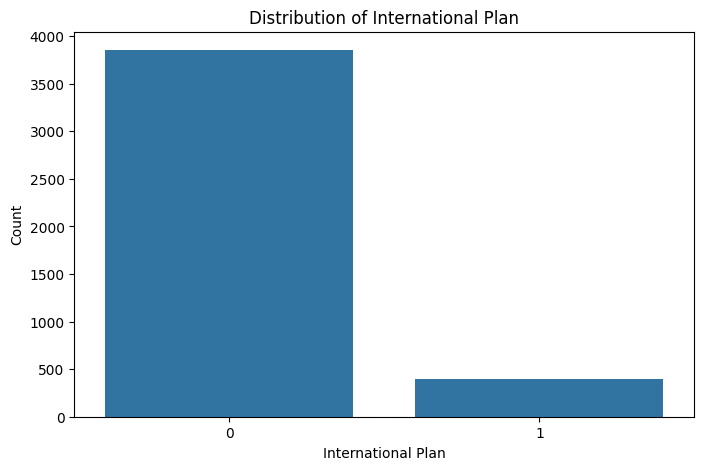

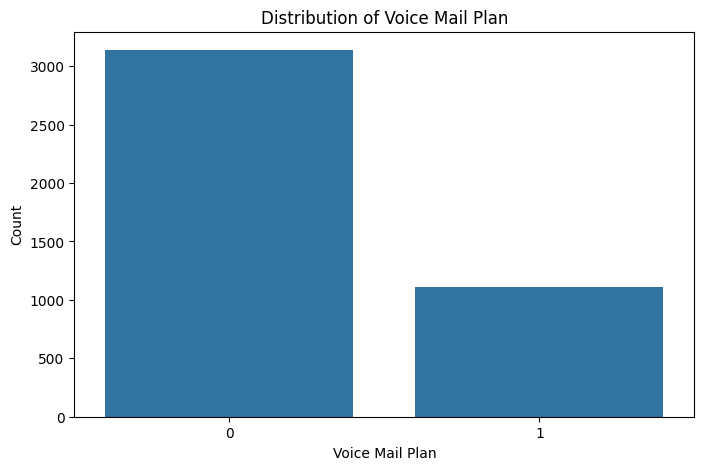

In [ ]:
# plot for 'international_plan'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='international_plan')
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

# plot for 'voice_mail_plan'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='voice_mail_plan')
plt.title('Distribution of Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()

- There is larger frequency of responses for 'yes' than 'no' for 'international_plan'
- There is larger frequency of responses for 'no' than 'yes' for 'voicemail_plan'

**Bar chart to visualize the values of 'area_code':**


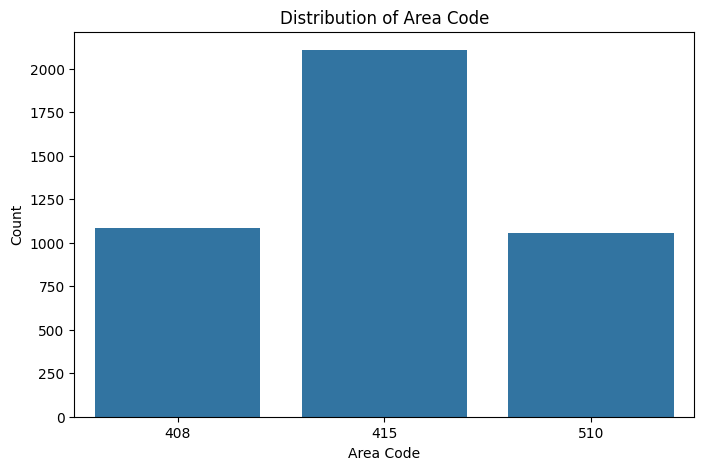

In [ ]:
# print the number of unique values in 'area_code' column
df_test['area_code'].nunique()

# plot for 'area_code'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='area_code')
plt.title('Distribution of Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

- The 'area_code' has 3 unique values: '415', '408', '510'
- The greatest frequency appears to be the value '415'

**Bar chart to visualize the values of 'state':**

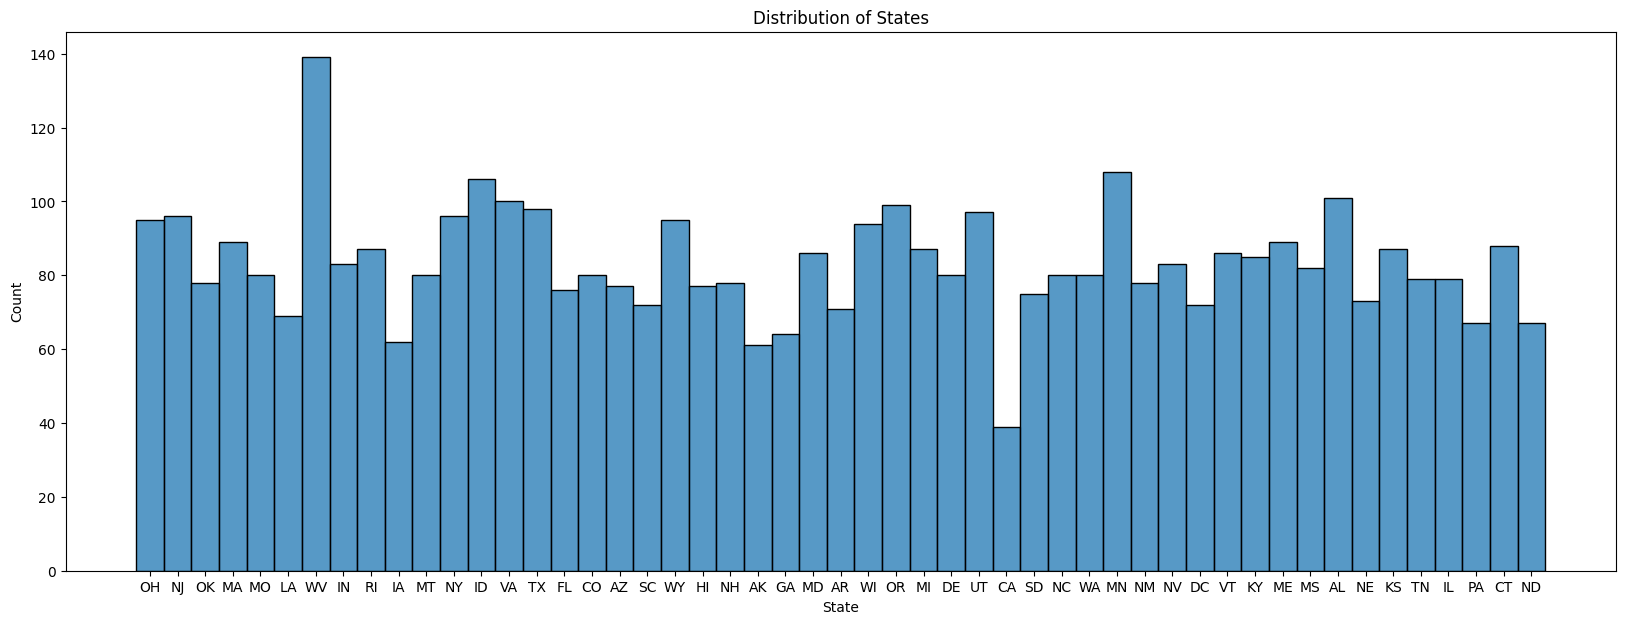

In [ ]:
# plot for 'state'
plt.figure(figsize=(20,7))
sns.histplot(data=df_train, x="state")
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

### Encoding and Feature Engineering

**Binary encoding for the 'international_plan', 'voicemail_plan', 'churn' columns and label encoding for the 'state' column:**

In [ ]:
# binary encode 'international_plan', 'voice_mail_plan', 'churn' column to make data easier to interpret
df_train['international_plan'] = df_train['international_plan'].replace({'yes': 1, 'no': 0})
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].replace({'yes': 1, 'no': 0})
df_train['churn'] = df_train['churn'].replace({'yes': 1, 'no': 0})

# display 'state' column before label encoding
df_train['state'].head()

<ipython-input-42-ddb8006bc8f8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['international_plan'] = df_train['international_plan'].replace({'yes': 1, 'no': 0})
<ipython-input-42-ddb8006bc8f8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['voice_mail_plan'] = df_train['voice_mail_plan'].replace({'yes': 1, 'no': 0})
<ipython-input-42-ddb8006bc8f8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

,state
0,OH
1,NJ
2,OH
3,OK
4,MA


In [ ]:
# label encode 'state' column to change the state labels into numerical values
label_encoder = LabelEncoder()
df_train['state'] = label_encoder.fit_transform(df_train['state'])

# display 'state' column after label encoding
df_train['state'].head()

,state
0,35
1,31
2,35
3,36
4,19


- Binary encoding for columns with 'yes'/'no' answers with 1 meaning 'yes' and 0 meaning 'no'
- Each state is now mapped to a unique integer value, makes data numerical and easier to process for data analysis

**Convert 'area_code' to an integer value:**

In [ ]:
# display 'area_code' before conversion
df_train['area_code'].head()

,area_code
0,area_code_415
1,area_code_415
2,area_code_408
3,area_code_415
4,area_code_510


In [ ]:
# convert 'area_code' into int and remove string ‘area_code_’
df_train['area_code'] = df_train['area_code'].str.replace('area_code_', '')
df_train['area_code'] = df_train['area_code'].astype(int)
df_train['area_code'].head()

,area_code
0,415
1,415
2,408
3,415
4,510


#### Urbanization Score (engineered feature)

In [ ]:
# group the states into larger categories ranked by population/level of urbanization (1 (Highest urbanization) and 3 (Lowest urbanization))
state_mapping = {
    "CA": 1, "TX": 1, "FL": 1, "NY": 1, "IL": 1,  "PA": 2, "OH": 2, "GA": 2, "NC": 2, "MI": 2,
    "NJ": 3, "VA": 3, "WA": 3, "AZ": 3, "MA": 3,  "TN": 4, "IN": 4, "MO": 4, "MD": 4, "WI": 4,
    "CO": 5, "MN": 5, "SC": 5, "AL": 5, "LA": 5,  "KY": 6, "OR": 6, "OK": 6, "CT": 6, "IA": 6,
    "MS": 7, "AR": 7, "KS": 7, "UT": 7, "NV": 7,  "NM": 8, "WV": 8, "NE": 8, "ID": 8, "HI": 8,
    "ME": 9, "NH": 9, "RI": 9, "MT": 9, "DE": 9,  "SD": 10, "ND": 10, "WY": 10, "VT": 10, "AK": 10
}

# Map states to urbanization score in the DataFrame
df_train['state_urbanization_score'] = df_train['state'].map(state_mapping)

print(df_train[['state', 'state_urbanization_score']].head())

# Categorize the area code; as there are only three area code - 408, 415 and 510 based on the research, we got an ranking for each area code based on urbanization (1 (Highest urbanization) and 3 (Lowest urbanization))
area_code_mapping = {415: 1, 408: 2, 510: 3}
df_train['state_urbanization_score'] = df_train['area_code'].map(area_code_mapping)

df_train.drop(columns = 'state', inplace = True)

   state  state_urbanization_score
0     35                       NaN
1     31                       NaN
2     35                       NaN
3     36                       NaN
4     19                       NaN


### Exploring Need for Normalization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
# Let us examine the distribution of the data for total_charge, total_minutes, and total_calls
plt.hist(df_train['total_charge'], edgecolor='black')
plt.title("Distribution of the total_charge in the training data")
plt.show()

plt.hist(df_train['total_minutes'], edgecolor='black')
plt.title("Distribution of the total_minutes in the training data")
plt.show()

plt.hist(df_train['total_calls'], edgecolor='black')
plt.title("Distribution of the total_calls in the training data")
plt.show()
'''

'\n# Let us examine the distribution of the data for total_charge, total_minutes, and total_calls\nplt.hist(df_train[\'total_charge\'], edgecolor=\'black\')\nplt.title("Distribution of the total_charge in the training data")\nplt.show()\n\nplt.hist(df_train[\'total_minutes\'], edgecolor=\'black\')\nplt.title("Distribution of the total_minutes in the training data")\nplt.show()\n\nplt.hist(df_train[\'total_calls\'], edgecolor=\'black\')\nplt.title("Distribution of the total_calls in the training data")\nplt.show()\n'

- As you can see, the distributions appear to be symmetric, unimodal, with no clear outliers based on this histogram, which is why we must create a box plot.

In [ ]:
'''
# Calculate IQR for selected columns
Q1 = df_train[['total_charge', 'total_minutes', 'total_calls']].quantile(0.25)
Q3 = df_train[['total_charge', 'total_minutes', 'total_calls']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df_train[((df_train[['total_charge', 'total_minutes', 'total_calls']] < lower_bound) | (df_train[['total_charge', 'total_minutes', 'total_calls']] > upper_bound)).any(axis=1)]
print("Outliers based on IQR:\n", outliers_iqr)

# Box plot showing outliers for total_charge
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_charge'])
plt.title('Box Plot of total_charge (with outliers)')
plt.show()

# Box plot for total_minutes
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_minutes'])
plt.title('Box Plot of total_minutes (with outliers)')
plt.show()

# Box plot for total_calls
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_calls'])
plt.title('Box Plot of total_calls (with outliers)')
plt.show()
'''

'\n# Calculate IQR for selected columns\nQ1 = df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']].quantile(0.25)\nQ3 = df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define bounds for outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Identify outliers\noutliers_iqr = df_train[((df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']] < lower_bound) | (df_train[[\'total_charge\', \'total_minutes\', \'total_calls\']] > upper_bound)).any(axis=1)]\nprint("Outliers based on IQR:\n", outliers_iqr)\n\n# Box plot showing outliers for total_charge\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train[\'total_charge\'])\nplt.title(\'Box Plot of total_charge (with outliers)\')\nplt.show()\n\n# Box plot for total_minutes\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train[\'total_minutes\'])\nplt.title(\'Box Plot of total_minutes (with outliers)\')\nplt.show()\n\n# Box plot for total_calls\nplt.figure(f

In [ ]:
'''
import numpy as np
# Function to cap outliers at the lower and upper bounds
def cap_outliers(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

# Cap outliers in each column at the IQR bounds
df_train['total_charge'] = cap_outliers(df_train['total_charge'], lower_bound['total_charge'], upper_bound['total_charge'])
df_train['total_minutes'] = cap_outliers(df_train['total_minutes'], lower_bound['total_minutes'], upper_bound['total_minutes'])
df_train['total_calls'] = cap_outliers(df_train['total_calls'], lower_bound['total_calls'], upper_bound['total_calls'])
'''

"\nimport numpy as np\n# Function to cap outliers at the lower and upper bounds\ndef cap_outliers(series, lower_bound, upper_bound):\n    return np.clip(series, lower_bound, upper_bound)\n\n# Cap outliers in each column at the IQR bounds\ndf_train['total_charge'] = cap_outliers(df_train['total_charge'], lower_bound['total_charge'], upper_bound['total_charge'])\ndf_train['total_minutes'] = cap_outliers(df_train['total_minutes'], lower_bound['total_minutes'], upper_bound['total_minutes'])\ndf_train['total_calls'] = cap_outliers(df_train['total_calls'], lower_bound['total_calls'], upper_bound['total_calls'])\n"

In [ ]:
'''
# Boxplot to visualize the effect of Capping on 'total_charge'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_charge'])
plt.title('Box Plot of total_charge After Capping')
plt.show()

# Boxplot to visualize 'total_minutes' after Capping
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_minutes'])
plt.title('Box Plot of total_minutes After Capping')
plt.show()

# Boxplot to visualize 'total_calls' after Capping
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['total_calls'])
plt.title('Box Plot of total_calls After Capping')
plt.show()
'''

"\n# Boxplot to visualize the effect of Capping on 'total_charge'\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train['total_charge'])\nplt.title('Box Plot of total_charge After Capping')\nplt.show()\n\n# Boxplot to visualize 'total_minutes' after Capping\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train['total_minutes'])\nplt.title('Box Plot of total_minutes After Capping')\nplt.show()\n\n# Boxplot to visualize 'total_calls' after Capping\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=df_train['total_calls'])\nplt.title('Box Plot of total_calls After Capping')\nplt.show()\n"

### Correlation Across Features and Label (with Charts/Graphs)

**Correlation Matrix Implementation:**

In [ ]:
# create correlation matrix and query the ‘churn’ column to see the top values correlated with the label
corr_matrix = round(df_train.corr(),5) # correlation matrix
display(corr_matrix)
corrs = corr_matrix['churn']
corrs_sorted = corrs.sort_values(ascending = False)
display(corrs_sorted)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,state_urbanization_score
account_length,1.00000,-0.01997,0.02705,0.00166,-0.00663,-0.00161,0.02300,-0.00161,-0.01033,0.00554,-0.01032,-0.00992,-0.00185,-0.00994,0.00454,0.01369,0.00449,0.00100,0.01938,-0.00971
area_code,-0.01997,1.00000,0.02786,-0.00834,-0.00713,-0.00820,-0.03448,-0.00820,0.01086,-0.00847,0.01087,0.00675,0.01815,0.00674,-0.00642,-0.01941,-0.00651,0.02288,0.01596,0.83196
international_plan,0.02705,0.02786,1.00000,0.00071,0.00481,0.04006,0.00978,0.04006,0.02348,-0.00300,0.02348,-0.02069,0.00715,-0.02069,0.02382,0.00696,0.02380,-0.00888,0.25905,0.01961
voice_mail_plan,0.00166,-0.00834,0.00071,1.00000,0.95401,-0.00065,-0.01000,-0.00066,0.01198,0.00026,0.01199,0.01788,0.00787,0.01788,0.00810,-0.00567,0.00813,-0.02150,-0.11464,-0.01279
number_vmail_messages,-0.00663,-0.00713,0.00481,0.95401,1.00000,0.00200,-0.00692,0.00199,0.01073,0.00359,0.01074,0.01831,0.00198,0.01830,0.00522,0.00659,0.00525,-0.01530,-0.10035,-0.00977
total_day_minutes,-0.00161,-0.00820,0.04006,-0.00065,0.00200,1.00000,0.00075,1.00000,-0.01325,0.00599,-0.01326,0.01005,-0.00481,0.01004,-0.02137,0.00386,-0.02129,-0.00292,0.21527,-0.02101
total_day_calls,0.02300,-0.03448,0.00978,-0.01000,-0.00692,0.00075,1.00000,0.00075,0.00866,0.00374,0.00866,0.00221,-0.00482,0.00220,0.00883,0.00938,0.00891,-0.01585,0.01164,-0.05035
total_day_charge,-0.00161,-0.00820,0.04006,-0.00066,0.00199,1.00000,0.00075,1.00000,-0.01325,0.00599,-0.01326,0.01005,-0.00482,0.01004,-0.02137,0.00385,-0.02130,-0.00293,0.21526,-0.02102
total_eve_minutes,-0.01033,0.01086,0.02348,0.01198,0.01073,-0.01325,0.00866,-0.01325,1.00000,0.00310,1.00000,-0.01402,0.01197,-0.01403,-0.00351,0.01224,-0.00346,-0.01006,0.07886,0.01915
total_eve_calls,0.00554,-0.00847,-0.00300,0.00026,0.00359,0.00599,0.00374,0.00599,0.00310,1.00000,0.00312,0.00843,-0.01193,0.00844,-0.01310,0.00495,-0.01315,0.00696,-0.00682,0.00020


,churn
churn,1.00000
international_plan,0.25905
number_customer_service_calls,0.22122
total_day_minutes,0.21527
total_day_charge,0.21526
total_eve_minutes,0.07886
total_eve_charge,0.07885
total_intl_minutes,0.05519
total_intl_charge,0.05518
total_night_minutes,0.04665


- As a result of computing the correlation matrix, we can notice how certain features are correlated with other features
  - For example, the 'number_vmail_messages' is strongly positively correlated with 'voice_mail_plan' with a score of 0.95401
- After querying with the label column, we can see that the top 3 features correlated with the label are 'international_plan', 'number_customer_services_calls', and 'total_day_minutes'

**Correlation Heatmaps:**

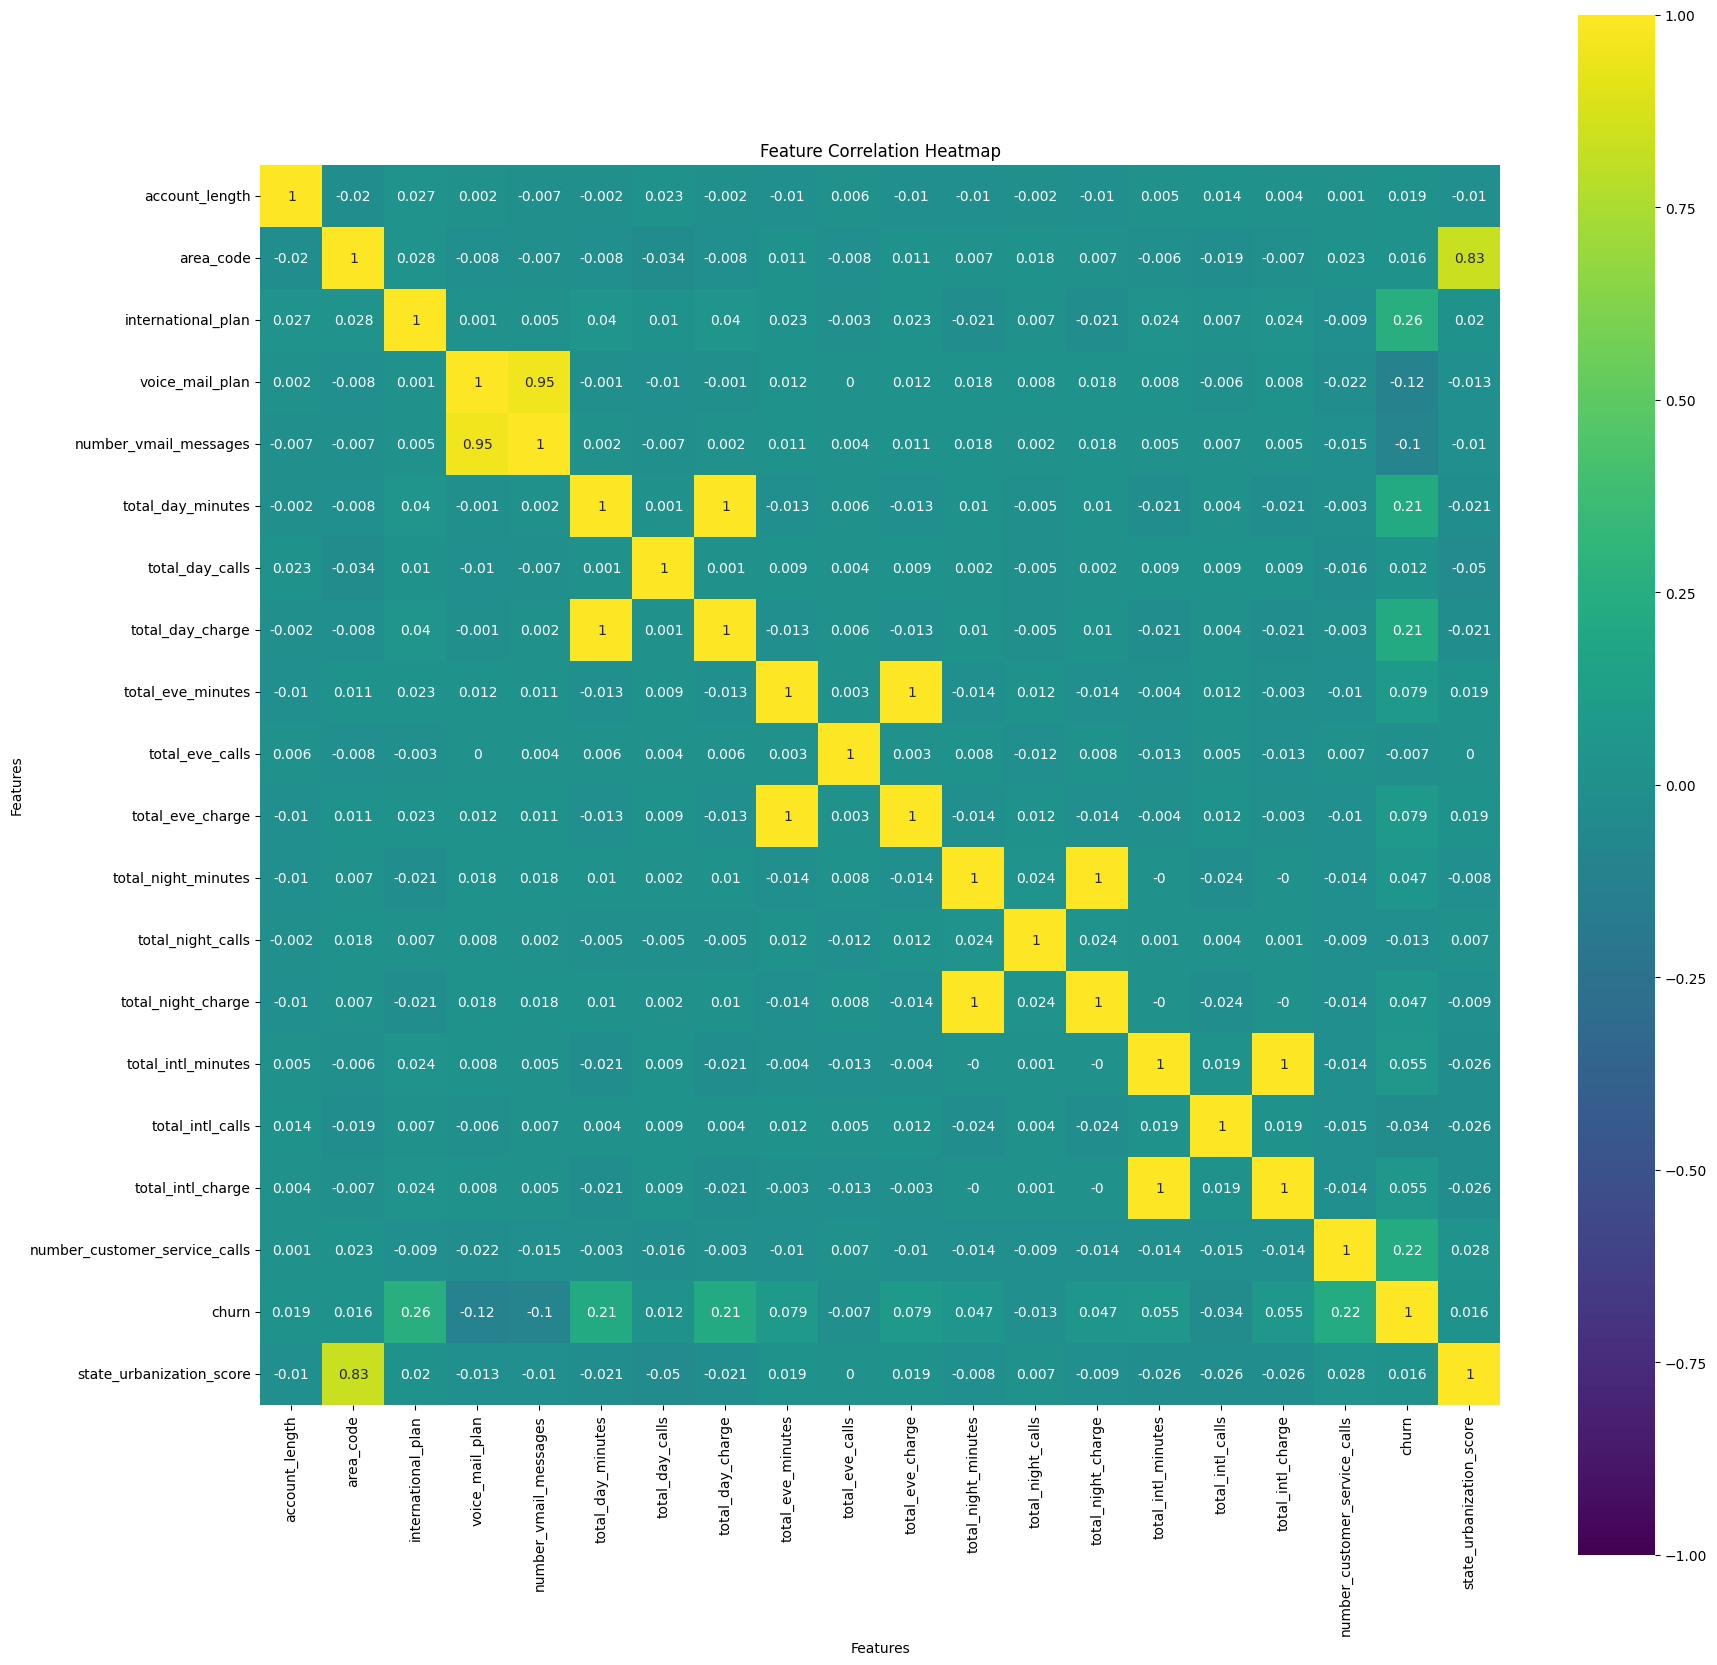

In [ ]:
# Calculate the correlation matrix
corr_matrix = round(df_train.corr(),3)

# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, square=True)

# Add labels and title
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


- This displays the correlation between each of the features, with higher aboslute values indicating a strong connection between those features (which is why the relationship between the same features on the diagonal is 1). Lighter yellow values indicate a higher positive correlation (as the value of one feature increases so does the other) while darker purple values indicate a negative correlation.

- For example, there is a strong relationship between 'total_eve_minutes' and 'total_eve_charge', which makes sense because you pay for the amount of minutes that you use.

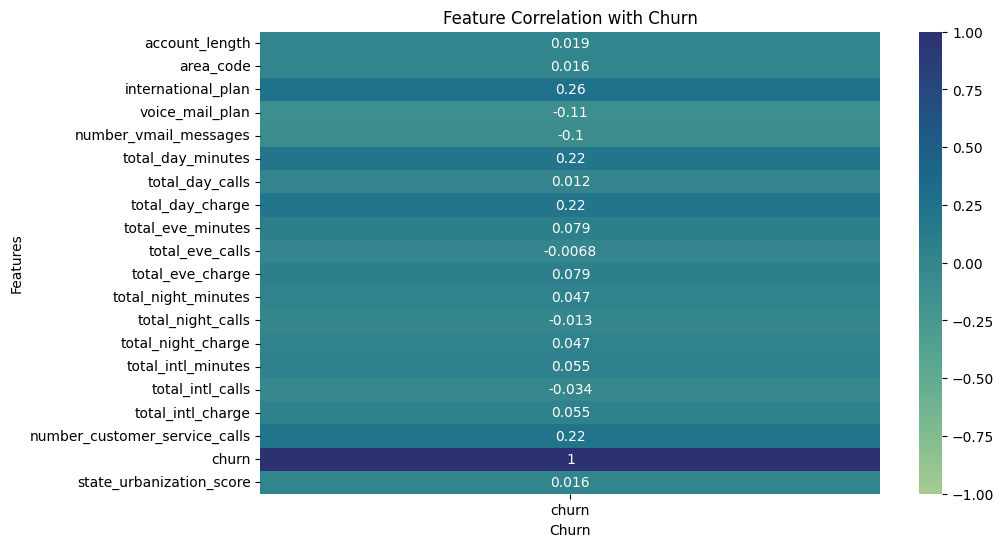

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_train.corr()

# Extract correlations related to the 'churn' column
churn_corr = corr_matrix[['churn']]

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(churn_corr, annot=True, cmap='crest', vmin=-1, vmax=1)

# Add labels and title
plt.title('Feature Correlation with Churn')
plt.xlabel('Churn')
plt.ylabel('Features')

# Show the plot
plt.show()

## Splitting Training and Testing Data



In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns = 'churn', inplace = False)
y = df_train['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

We split the df_train dataset (dataset with the label column) into X_train, X_test, y_train, y_test.

## Test ML Algorithms with the Data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if len(set(y_test)) == 2:
      roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_auc = None
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    if roc_auc is not None:
        print(f'ROC AUC: {roc_auc}')
    print(classification_report(y_test, y_pred))
    return accuracy, precision, recall, f1, roc_auc

###XG Boost

Run the training data using python's xgboost package

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

print(xgb.__version__)

xg_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xg_model.fit(X_train, y_train)
xg_y_pred = xg_model.predict(X_test)
accuracy = accuracy_score(y_test, xg_y_pred)
print(f'Accuracy: {accuracy}')


2.1.2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:01:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9694117647058823


In [ ]:
xg_accuracy, xg_precision, xg_recall, xg_f1, xg_roc_auc = evaluate_model(xg_model, X_test, y_test)

Accuracy: 0.9694117647058823
Precision: 0.9689102430004928
Recall: 0.9694117647058823
F1 Score: 0.9683513725490197
ROC AUC: 0.9378306878306877
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       742
           1       0.95      0.81      0.87       108

    accuracy                           0.97       850
   macro avg       0.96      0.90      0.93       850
weighted avg       0.97      0.97      0.97       850



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:15:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best score:  0.9579411764705883


In [ ]:
better_xg_model = xgb.XGBClassifier(colsample_bytree=1, gamma=0, learning_rate=.1, max_depth=7, n_estimators=200, subsample=1)
better_xg_model.fit(X_train, y_train)
better_xg_y_pred = better_xg_model.predict(X_test)
better_xg_accuracy = accuracy_score(y_test, better_xg_y_pred)
print(f'Accuracy: {better_xg_accuracy}')

Accuracy: 0.9682352941176471


### Decision Trees

Test a decision tree model with the dataset using the default hyperparameters of the DecisionTreeClassifier model from Scikit-Learn:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9305882352941176


Find better hyperparameters for the decision tree using GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
Accuracy: 0.9564705882352941


Evaluate the Precision, Recall, F1 Score, and ROC AUC:

In [ ]:
accuracy, precision, recall, f1, roc_auc = evaluate_model(best_model, X_test, y_test)

Accuracy: 0.9564705882352941
Precision: 0.9550326256977418
Recall: 0.9564705882352941
F1 Score: 0.9546465901679273
ROC AUC: 0.8654537286612758
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       742
           1       0.90      0.74      0.81       108

    accuracy                           0.96       850
   macro avg       0.93      0.86      0.89       850
weighted avg       0.96      0.96      0.95       850



### Support Vector Machines (SVM)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale', probability =True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(accuracy)

0.8729411764705882

In [ ]:
evaluate_model(svm_model, X_test, y_test)

Accuracy: 0.8729411764705882
Precision: 0.7620262975778547
Recall: 0.8729411764705882
F1 Score: 0.813721548921076
ROC AUC: 0.7969826295297994
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       742
           1       0.00      0.00      0.00       108

    accuracy                           0.87       850
   macro avg       0.44      0.50      0.47       850
weighted avg       0.76      0.87      0.81       850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

(0.8729411764705882,
 0.7620262975778547,
 0.8729411764705882,
 0.813721548921076,
 0.7969826295297994)

### Random Forest

In [ ]:
#packages to import
from sklearn.ensemble import RandomForestClassifier
# create the model and fit it to the data
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_model.fit(X_train, y_train)

# generate predictions from the test data and analyze the model’s performance
rf_preds = rf_model.predict(X_test)

# raw accuracy score
raw_acc = accuracy_score(y_test, rf_preds)
print(raw_acc)

# area under roc curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
auc = auc(fpr, tpr)
print(auc)

0.96
0.921957671957672


In [ ]:
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(rf_model, X_test, y_test)

Accuracy: 0.96
Precision: 0.9593882879522566
Recall: 0.96
F1 Score: 0.9578183023872678
ROC AUC: 0.921957671957672
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       742
           1       0.94      0.73      0.82       108

    accuracy                           0.96       850
   macro avg       0.95      0.86      0.90       850
weighted avg       0.96      0.96      0.96       850



In [ ]:
better_rf = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
better_rf.fit(X_train, y_train)

# generate predictions from the test data and analyze the model’s performance
better_rf_preds = better_rf.predict(X_test)

# raw accuracy score
better_rf_acc = accuracy_score(y_test, better_rf_preds)
print(better_rf_acc)


0.9647058823529412


### K Nearest Neighbors

In [ ]:
# import packages
from sklearn.neighbors import KNeighborsClassifier

# initialize the model
knn_model = KNeighborsClassifier()

# train the model using the training sets
knn_model.fit(X_train, y_train)

# make predictions on the test set
knn_prediction = knn_model.predict(X_test)

# compute and print model's accuracy score
score = accuracy_score(y_test, knn_prediction)
print('Accuracy score of model: ' + str(score))

Accuracy score of model: 0.9


In [ ]:
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc = evaluate_model(knn_model, X_test, y_test)

Accuracy: 0.9
Precision: 0.8872956352182392
Recall: 0.9
F1 Score: 0.886927514833347
ROC AUC: 0.7337027054008186
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       742
           1       0.69      0.38      0.49       108

    accuracy                           0.90       850
   macro avg       0.81      0.68      0.72       850
weighted avg       0.89      0.90      0.89       850



###Logistic Regression

In [ ]:
# packages to import
from sklearn.linear_model import LogisticRegression

# create the model and fit it to the data
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# generate predictions from the test data and analyze the model’s performance
lr_preds = lr_model.predict(X_test)

# make predictions on the test set
y_pred = lr_model.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8894117647058823


In [ ]:
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc = evaluate_model(lr_model, X_test, y_test)

Accuracy: 0.8894117647058823
Precision: 0.8745652797704448
Recall: 0.8894117647058823
F1 Score: 0.8609197337009735
ROC AUC: 0.8434286712588598
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       742
           1       0.73      0.20      0.32       108

    accuracy                           0.89       850
   macro avg       0.81      0.60      0.63       850
weighted avg       0.87      0.89      0.86       850



### Evaluate and Compare Model Performance

**Interpretation of Metrics:**
- **Accuracy Score:** Represents the ratio of all the correct predictions to the total number of predictions.
- **Precision**: proportion of true positives the model guessed correction compared to the total number of positive predictions the model made. The closer the number is to one, the better because that indicates that the model is not biased towards predicting a certain outcome the majority of the time, assuming there is not a major class imbalance
- **Recall**: this is the model's ability to accurately determine the number of positive instances in a dataset. It is the # of true positives / (# true positives + # false negatives )
- **F1 Score:** represents a balance between these two metrics since there is a tradeoff and you cannot increase one without affecting the other.
- **AUC ROC:** This metric represents the area under the curve for receiver-operating characteristic. This represents the frequency of false positives for the model, with higher values meaning that the model is better able to distinguish between the classes.

**Visualize accuracy metrics in comparison with all 5 models:**

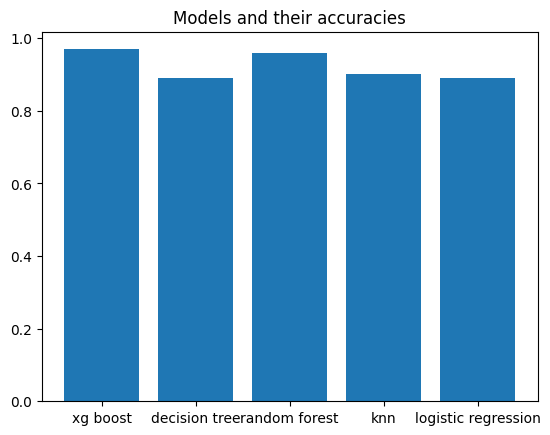

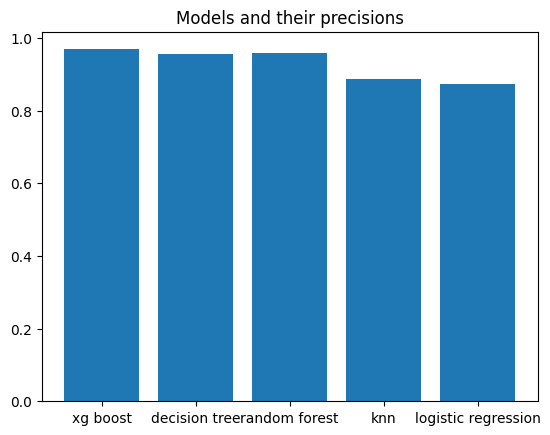

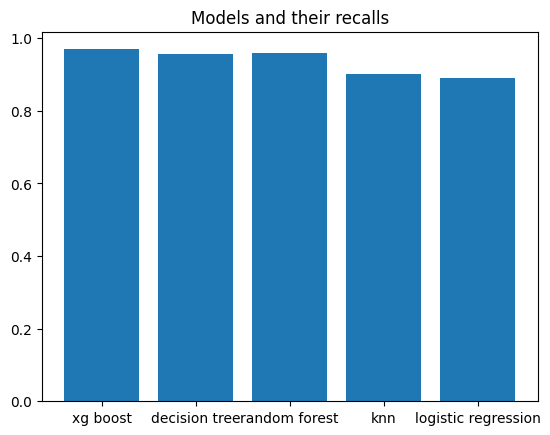

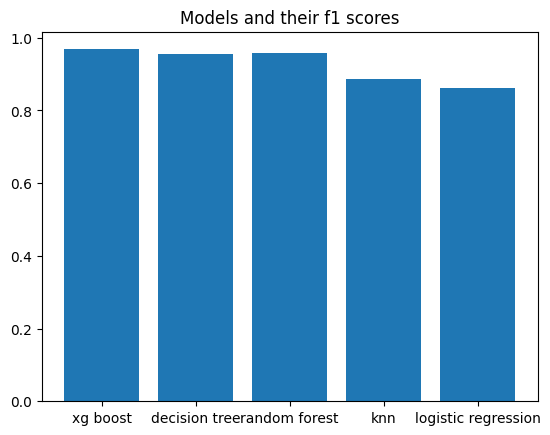

In [ ]:
names = ['xg boost', 'decision tree', 'random forest', 'knn', 'logistic regression']
accuracies = [xg_accuracy, accuracy, rf_accuracy, knn_accuracy, lr_accuracy]
precisions = [xg_precision, precision, rf_precision, knn_precision, lr_precision]
recalls = [xg_recall, recall, rf_recall, knn_recall, lr_recall]
f1_scores = [xg_f1, f1, rf_f1, knn_f1, lr_f1]

plt.bar(names, accuracies)
plt.title("Models and their accuracies")
plt.show()

plt.bar(names, precisions)
plt.title("Models and their precisions")
plt.show()

plt.bar(names, recalls)
plt.title("Models and their recalls")
plt.show()

plt.bar(names, f1_scores)
plt.title("Models and their f1 scores")
plt.show()

### Run ML Models After Balancing the Dataset

**Bar chart to visualize the value frequency of the label column:**

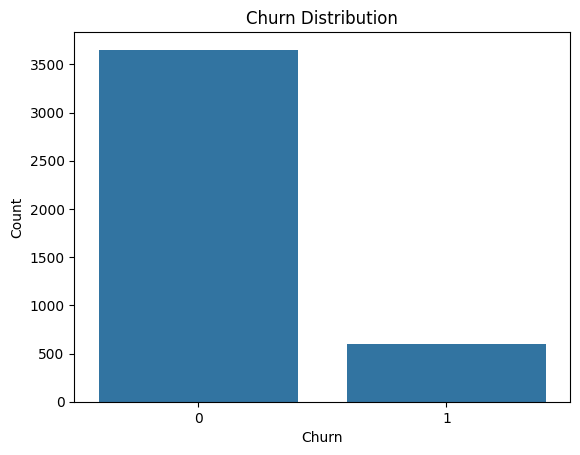

In [ ]:
# plot for 'voice_mail_plan'
churn_counts = df_train['churn'].value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [ ]:
# calculate ratios
churn_proportion = churn_counts / len(df_train)
print(churn_proportion)

churn
0    0.859294
1    0.140706
Name: count, dtype: float64


- We can consider a dataset imbalanced if the ratio of the majority class to the minority class is greater than 4:1 or if the minority class constitutes less than 20% of the total data.
- To address issues arising from imbalanced datasets, we can use techniques like oversampling the minority class (e.g., SMOTE) or undersampling the majority class.
- Later on, we can use metrics such as F1-score, Precision-Recall curve, and AUC-ROC instead of accuracy alone, as accuracy can be misleading in these cases.

**Implementation of the Synthetic Minority Over-sampling Technique:**

In [ ]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

smote = SMOTE(k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) # use SMOTE to resample data

X_resampled
y_resampled

,churn
0,1
1,0
2,1
3,0
4,0
...,...
5815,1
5816,1
5817,1
5818,1


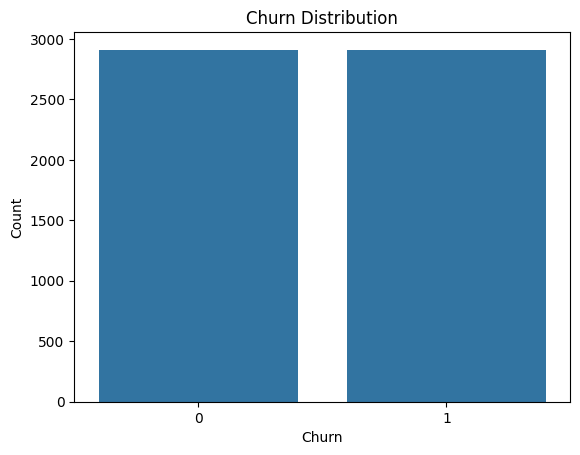

In [ ]:
churn_counts = y_resampled.value_counts()
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

###XG Boost after Balancing the Dataset

Run the training data using python's xgboost package

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_curve, auc


xg_model_bal = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xg_model_bal.fit(X_resampled, y_resampled)
xg_y_pred_bal = xg_model_bal.predict(X_test)
xgb_balanced_accuracy = accuracy_score(y_test, xg_y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:33:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8894117647058823


In [ ]:
evaluate_model(xg_model_bal, X_test, y_test)

Accuracy: 0.9552941176470588
Precision: 0.9549578127051186
Recall: 0.9552941176470588
F1 Score: 0.9551152963669713
ROC AUC: 0.9465159229310174
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       742
           1       0.83      0.81      0.82       108

    accuracy                           0.96       850
   macro avg       0.90      0.90      0.90       850
weighted avg       0.95      0.96      0.96       850



(0.9552941176470588,
 0.9549578127051186,
 0.9552941176470588,
 0.9551152963669713,
 0.9465159229310174)

### Random Forest after Balancing the Dataset

In [ ]:
# create the model and fit it to the data
rf_model_bal = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_model_bal.fit(X_resampled, y_resampled)

# generate predictions from the test data and analyze the model’s performance
rf_preds_bal = rf_model_bal.predict(X_test)

# raw accuracy score
rf_balanced_acc = accuracy_score(y_test, rf_preds_bal)
print(raw_acc)

0.96


In [ ]:
evaluate_model(rf_model_bal, X_test, y_test)

Accuracy: 0.9552941176470588
Precision: 0.9537139733718427
Recall: 0.9552941176470588
F1 Score: 0.9537443137254903
ROC AUC: 0.9326457522212238
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       742
           1       0.88      0.75      0.81       108

    accuracy                           0.96       850
   macro avg       0.92      0.87      0.89       850
weighted avg       0.95      0.96      0.95       850



(0.9552941176470588,
 0.9537139733718427,
 0.9552941176470588,
 0.9537443137254903,
 0.9326457522212238)

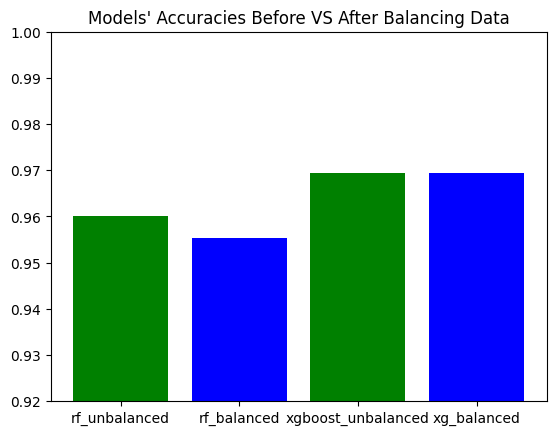

In [ ]:
names = ["rf_unbalanced", "rf_balanced", "xgboost_unbalanced", "xg_balanced"]
accuracies = [rf_accuracy, rf_balanced_acc, xg_accuracy, xgb_balanced_accuracy]
colors = ['green', 'blue', 'green', 'blue']
plt.bar(names, accuracies, color=colors )
plt.ylim(.92, 1)
plt.title("Models' Accuracies Before VS After Balancing Data")
plt.show()

It seems like applying SMOTE to balance the dataset does not lead to better model performance. In both the XG Boost and Random Forest Algorithms, the accuracy score dropped, which could be because of overfitting in the model.

# TensorFlow Implementation (DNN Model)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7198 - loss: 21.3910 - val_accuracy: 0.8647 - val_loss: 1.8514
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7306 - loss: 4.8751 - val_accuracy: 0.8426 - val_loss: 0.5687
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 2.1472 - val_accuracy: 0.8647 - val_loss: 0.5867
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7602 - loss: 1.5434 - val_accuracy: 0.8647 - val_loss: 0.5057
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.8902 - val_accuracy: 0.8647 - val_loss: 0.5269
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.7469 - val_accuracy: 0.8647 - val_loss: 0.4616
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.6346 - val_accuracy: 0.8647 - val_loss: 0.4664
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.5608 - val_accuracy: 0.8647 - 

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8729
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[742   0]
 [108   0]]
